In [2]:
!pip3 install pandas
import pandas as pd
import matplotlib.pyplot as plt

# Load the ratings.csv file into a pandas DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv")


book_id = df["book_id"].tolist()
rating = df["rating"].tolist()
res = list(zip(book_id,rating))

In [3]:
books = pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv")
tags_data = pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/book_tags.csv")

book_tags = pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/tags.csv")

ratings_data=pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv")

In [20]:
!pip3 install plotly
import plotly.express as px
top_rated = books.sort_values('average_rating', ascending = False)[:17]
figure = px.bar(top_rated, x = 'average_rating',y = 'original_title', color = 'original_title', orientation  ='h', width = 1400)
figure.show()

In [28]:
top_author = books['authors'].value_counts().reset_index()
top_author.columns = ['value', 'count']
top_author['value'] = top_author['value']
top_author = top_author.sort_values('count', ascending = False)
figure = px.bar(top_author.head(10), x="count", y="value", color='value', orientation='h',
             width=1100)
figure.show()

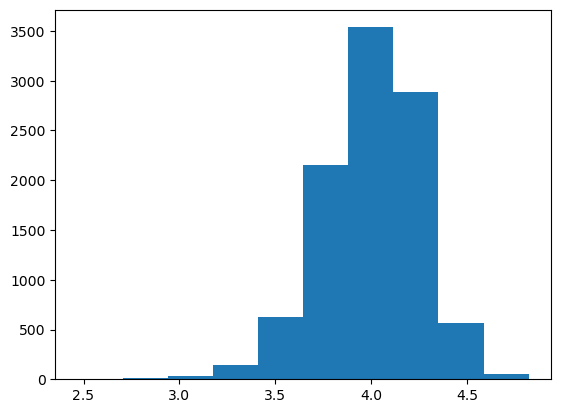

In [30]:
plt.hist(books['average_rating'])
plt.show()

In [31]:
# Filter the ratings data to only include ratings of 4 or higher
high_ratings = ratings_data[ratings_data['rating'] >= 4]

# Merge the high ratings data with the books data to get the book and author information
high_ratings_with_books = pd.merge(high_ratings, books, on='book_id')

# Calculate the total number of ratings and the total number of high ratings for each author
author_ratings = high_ratings_with_books.groupby('authors').agg({'rating': 'count', 'book_id': 'nunique'})

# Calculate the probability of a high rating for each author
author_ratings['probability'] = author_ratings['rating'] / author_ratings['book_id']

# Sort the authors by their probability of a high rating
author_ratings = author_ratings.sort_values(by='probability', ascending=False)

# Print the top 10 authors by probability of a high rating
print(author_ratings.head(10))


                                                    rating  book_id  \
authors                                                               
J.K. Rowling, Mary GrandPré, Rufus Beck              13822        1   
Kathryn Stockett                                     11086        1   
George Orwell, Erich Fromm, Celâl Üster              11010        1   
J.K. Rowling, Mary GrandPré                          85359        8   
Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-Do...    8986        1   
Harper Lee                                           16896        2   
Arthur Golden                                         8187        1   
William Golding                                       8082        1   
Charlotte Brontë, Michael Mason                       7537        1   
E.B. White, Garth Williams, Rosemary Wells            7109        1   

                                                    probability  
authors                                                          
J.K. Rowling, M

In [33]:
title_length = books[['title', 'average_rating']]
title_length['length'] = title_length['title'].str.findall('\s').apply(lambda x: len(x)+1)
title_length.head(15)

C:\Users\darsh\AppData\Local\Temp\ipykernel_30912\3766372578.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,average_rating,length
0,"The Hunger Games (The Hunger Games, #1)",4.34,7
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,9
2,"Twilight (Twilight, #1)",3.57,3
3,To Kill a Mockingbird,4.25,4
4,The Great Gatsby,3.89,3
5,The Fault in Our Stars,4.26,5
6,The Hobbit,4.25,2
7,The Catcher in the Rye,3.79,5
8,"Angels & Demons (Robert Langdon, #1)",3.85,7
9,Pride and Prejudice,4.24,3


In [35]:
books[['title', 'original_publication_year', 'average_rating']].sort_values('original_publication_year').head(15)

,title,original_publication_year,average_rating
2075,The Epic of Gilgamesh,-1750.0,3.63
2141,The Iliad/The Odyssey,-762.0,4.03
340,The Iliad,-750.0,3.83
6165,The I Ching or Book of Changes,-750.0,4.18
78,The Odyssey,-720.0,3.73
1119,Aesop's Fables,-560.0,4.05
9678,The Upanishads: Translations from the Sanskrit,-500.0,4.20
402,The Art of War,-500.0,3.95
5636,The Dhammapada,-500.0,4.29
7777,The Analects,-476.0,3.82
